In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings("ignore")
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Loading the embeddings created and discussing the similarity of word vector pairs

In [2]:
# using code supplied in lab 9, "load_embeddings.py"

wv = KeyedVectors.load("created_ontology.embeddings", mmap='r')

    
pair1 = wv.similarity('Beef', 'miscellaneous')
pair2 = wv.similarity('data', 'salami')
pair3 = wv.similarity('Pizza_base', 'vegetarian_pizza')
pair4 = wv.similarity('Vegetarian_pizza', 'vegetarian_pizza')
pair5 = wv.similarity('vegetable', 'vegetarian')


print("similarity between 'Beef' and 'miscellaneous': {}".format(pair1))
print("similarity between 'data' and 'salami': {}".format(pair2))
print("similarity between 'Pizza_base' and 'vegetarian_pizza': {}".format(pair3))
print("similarity between 'Vegetarian_pizza' and 'vegetarian_pizza': {}".format(pair4))
print("similarity between 'vegetable' and 'vegetarian': {}".format(pair5))

similarity between 'Beef' and 'miscellaneous': 0.6639835834503174
similarity between 'data' and 'salami': 0.7758181691169739
similarity between 'Pizza_base' and 'vegetarian_pizza': 0.9895997643470764
similarity between 'Vegetarian_pizza' and 'vegetarian_pizza': 0.9902489185333252
similarity between 'vegetable' and 'vegetarian': 0.9444867372512817


The cosine similarity between the vectors of these pairs of words vary in a way that is to be expected. In pair 1, little is similar about the two words: they are different in the letters they contain and their length. Moving forward, salami and data are more similar in length, and share some of the same vowel structure. With pair 3 onwards, words are deemed by gensim to be very similar indeed: 'Pizza_base' nand 'vegetarian_pizza' have a word in common, as well as the linking underscore, so follow the same rare structure. The highest score is unsurprisingly that of 'Vegetarian_pizzza', and 'vegetarian_pizza': a score of over 99 indicates the smallest possible difference between the two words, which is indeed the case.

### Clustering the embeddings using K-means algorithm, and visualising using Principal Component Anlysis (PCA)

In [3]:
# gathering all word vectors created in owl2vec embedding

wordvec_dict = {}
wordvec_list = []

for each in wv.wv.vocab:
    wordvec_dict[each] = wv[each]
    wordvec_list.append(wv[each])
    
x = np.array(wordvec_list)

In [4]:
y = list(wordvec_dict.keys())

For n_clusters = 3 The average silhouette_score is : 0.5134591
For n_clusters = 4 The average silhouette_score is : 0.5270091
For n_clusters = 5 The average silhouette_score is : 0.5225046
For n_clusters = 6 The average silhouette_score is : 0.5417459
For n_clusters = 7 The average silhouette_score is : 0.5227992
For n_clusters = 8 The average silhouette_score is : 0.52775294


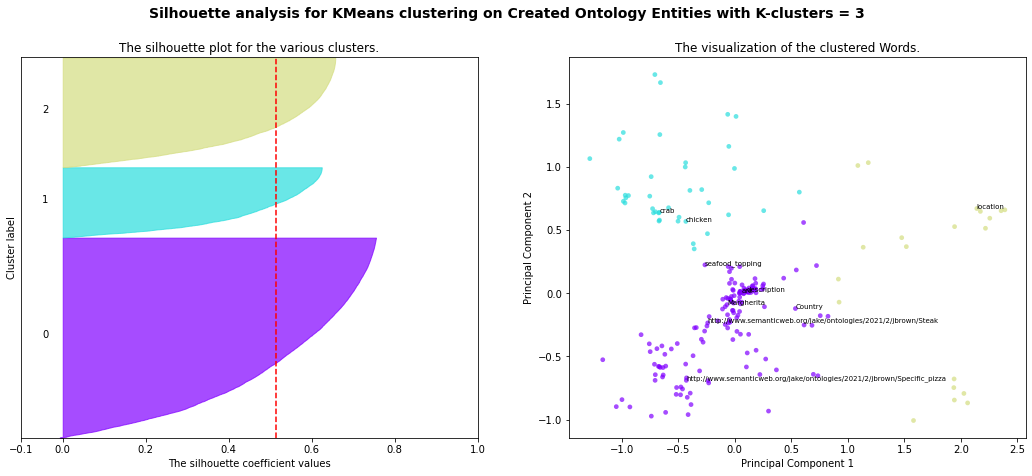

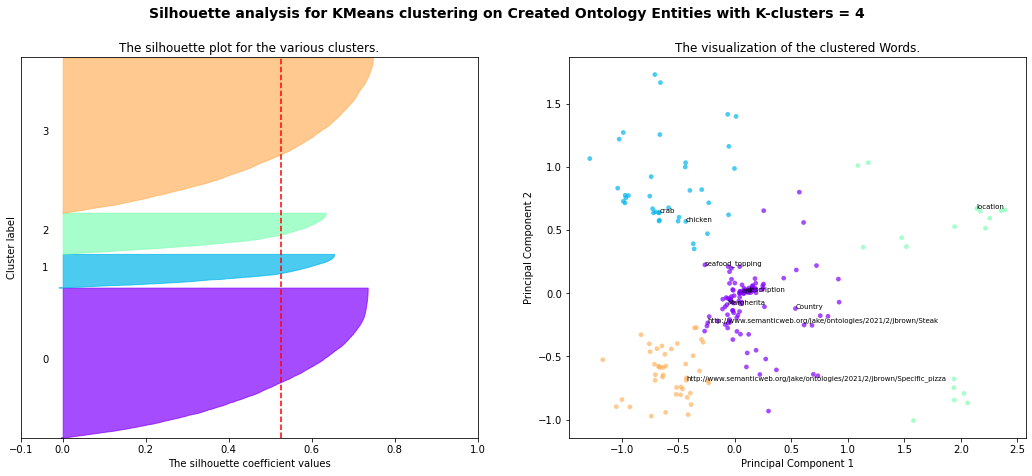

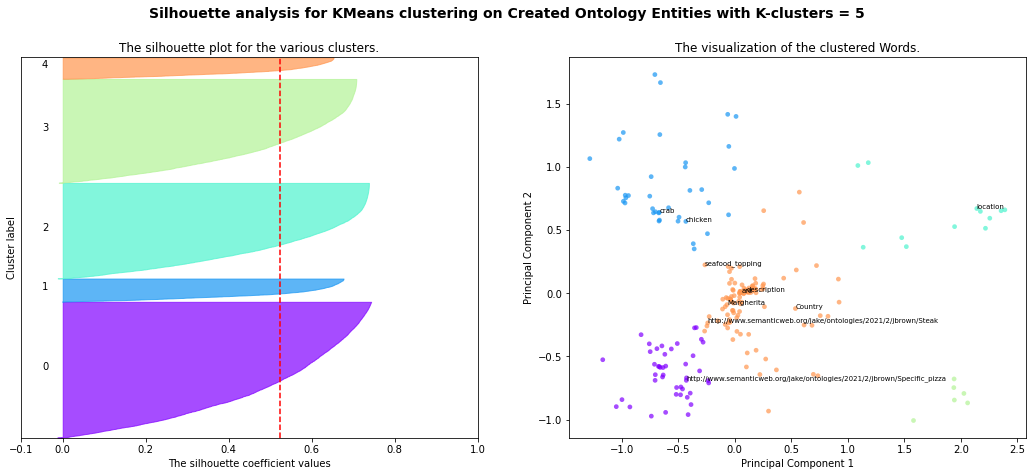

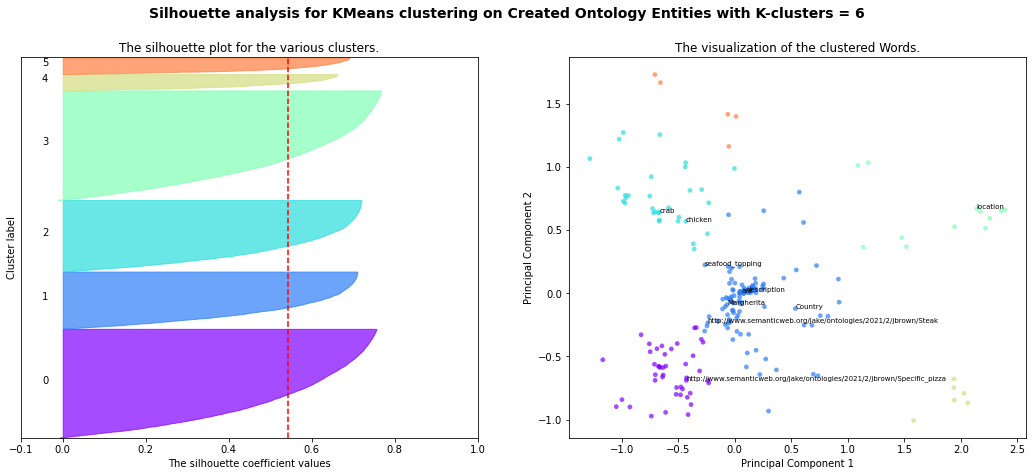

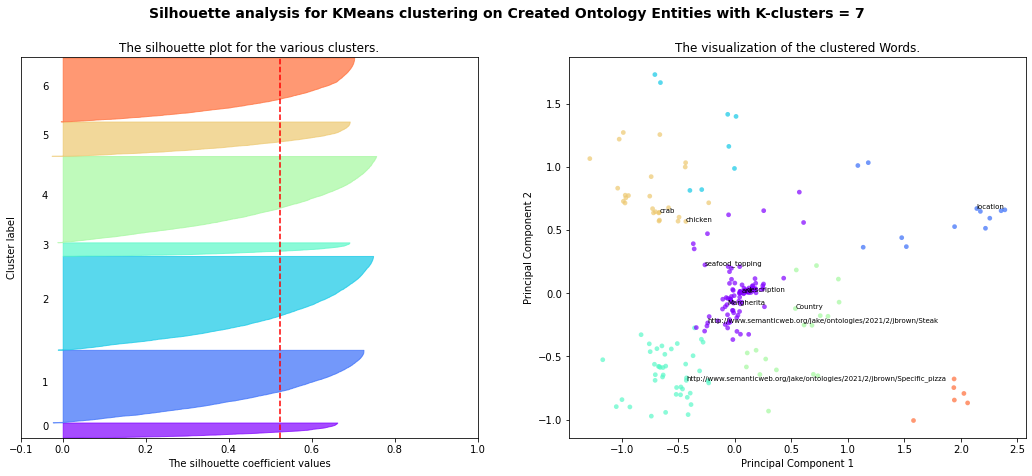

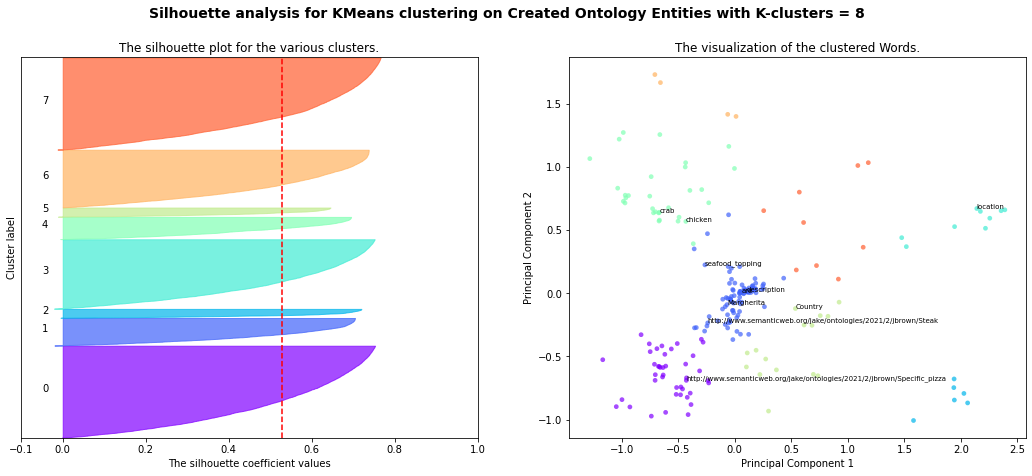

In [5]:
range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x.reshape(-1, 1)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x.reshape(-1, 1))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x.reshape(-1, 1), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x.reshape(-1, 1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap('rainbow')(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels2 = clusterer.fit_predict(x)
    kmeansndfeatures = pd.DataFrame(x)
    kmeansndfeatures['cluster'] = cluster_labels2
    
    pca = PCA(n_components = 2)
    pca.fit(x)
    pcafeatures = pca.transform(x)
    
    # Label to color dict (automatic)
    label_color_dict = {label:idx for idx,label in enumerate(np.unique(kmeansndfeatures['cluster']))}

    # Color vector creation
    cvec = [label_color_dict[label] for label in kmeansndfeatures['cluster']]
    
    colours = cm.get_cmap('rainbow')(cluster_labels2.astype(float) / n_clusters)
    ax2.scatter(pcafeatures[:, 0], pcafeatures[:, 1], marker = '.', s=90, lw=0, alpha=0.7,
                c=colours, edgecolor='k')
    for idx, val in enumerate(y):
        if ((idx % 20 == 0) and (len(val) < 400) and ("Has_location" not in val)):
            ax2.annotate(val, (pcafeatures[idx, 0], pcafeatures[idx, 1]), fontsize = 7)
        else:
            ax2.annotate('', (pcafeatures[idx, 0], pcafeatures[idx, 1]))

    ax2.set_title("The visualization of the clustered Words.")
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    

    plt.suptitle(("Silhouette analysis for KMeans clustering on Created Ontology Entities "
                  "with K-clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()